# Project Work for Jason Liebmann and Jimmy Gao

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import math

In [2]:
%matplotlib inline

In [3]:
basketball_data = pd.read_csv('2016-2017NBABoxScoresAverages1.csv')

In [4]:
basketball_data.head()

,Unnamed: 0,DATE,TEAM,ID.TEAM,OPPTEAM,FGM.TEAM,FGA.TEAM,X3PM.TEAM,X3PA.TEAM,FTA.TEAM,...,AST.AVG.5.OPP,TOV.AVG.5.OPP,STL.AVG.5.OPP,BLK.AVG.5.OPP,PF.AVG.5.OPP,PTS.AVG.5.OPP,P.M.AVG.5.OPP,SPREAD,EFF.FG.TEAM,NRtg.TEAM.AVG
0,1,2016-10-25,CLEVELAND CAVALIERS,3,NEW YORK KNICKS,45,94,13,35,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0
1,2,2016-10-25,GOLDEN STATE WARRIORS,6,SAN ANTONIO SPURS,40,85,7,33,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29,0.0,0.0
2,3,2016-10-25,NEW YORK KNICKS,1,CLEVELAND CAVALIERS,32,87,9,27,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29,0.0,0.0
3,4,2016-10-25,PORTLAND TRAIL BLAZERS,2,UTAH JAZZ,39,75,13,19,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.0,0.0
4,5,2016-10-25,SAN ANTONIO SPURS,5,GOLDEN STATE WARRIORS,47,98,12,24,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,0.0


In [5]:
basketball_data.columns

Index(['Unnamed: 0', 'DATE', 'TEAM', 'ID.TEAM', 'OPPTEAM', 'FGM.TEAM',
       'FGA.TEAM', 'X3PM.TEAM', 'X3PA.TEAM', 'FTA.TEAM',
       ...
       'AST.AVG.5.OPP', 'TOV.AVG.5.OPP', 'STL.AVG.5.OPP', 'BLK.AVG.5.OPP',
       'PF.AVG.5.OPP', 'PTS.AVG.5.OPP', 'P.M.AVG.5.OPP', 'SPREAD',
       'EFF.FG.TEAM', 'NRtg.TEAM.AVG'],
      dtype='object', length=107)

In [6]:
cleaned_basketball_data = basketball_data.drop(['Unnamed: 0', 'ID.TEAM', 'P.M.TEAM', 'FGM.AVG.TEAM', 'FGA.AVG.TEAM', 'X3PM.AVG.TEAM', 'X3PA.AVG.TEAM', 'FTA.AVG.TEAM', 'FTM.AVG.TEAM', 'OREB.AVG.TEAM', 'DREB.AVG.TEAM', 'REB.AVG.TEAM', 'AST.AVG.TEAM', 'TOV.AVG.TEAM', 'STL.AVG.TEAM', 'BLK.AVG.TEAM', 'PF.AVG.TEAM', 'PTS.AVG.TEAM', 'P.M.AVG.TEAM', 'P.M.OPP', 'HOME.OPP', 'FGM.AVG.OPP', 'FGA.AVG.OPP', 'X3PM.AVG.OPP', 'X3PA.AVG.OPP', 'FTA.AVG.OPP', 'FTM.AVG.OPP', 'OREB.AVG.OPP', 'DREB.AVG.OPP', 'REB.AVG.OPP', 'AST.AVG.OPP', 'TOV.AVG.OPP', 'STL.AVG.OPP', 'BLK.AVG.OPP', 'PF.AVG.OPP', 'PTS.AVG.OPP', 'P.M.AVG.OPP', 'TEAM.1', 'FGM.AVG.5.TEAM', 'FGA.AVG.5.TEAM', 'X3PM.AVG.5.TEAM', 'X3PA.AVG.5.TEAM', 'FTA.AVG.5.TEAM', 'FTM.AVG.5.TEAM', 'OREB.AVG.5.TEAM', 'DREB.AVG.5.TEAM', 'REB.AVG.5.TEAM', 'AST.AVG.5.TEAM', 'TOV.AVG.5.TEAM', 'STL.AVG.5.TEAM', 'BLK.AVG.5.TEAM', 'PF.AVG.5.TEAM', 'PTS.AVG.5.TEAM', 'P.M.AVG.5.TEAM', 'FGM.AVG.5.OPP', 'FGA.AVG.5.OPP', 'X3PM.AVG.5.OPP', 'X3PA.AVG.5.OPP', 'FTA.AVG.5.OPP', 'FTM.AVG.5.OPP','OREB.AVG.5.OPP', 'DREB.AVG.5.OPP', 'REB.AVG.5.OPP', 'AST.AVG.5.OPP', 'TOV.AVG.5.OPP', 'STL.AVG.5.OPP', 'BLK.AVG.5.OPP', 'PF.AVG.5.OPP', 'PTS.AVG.5.OPP', 'P.M.AVG.5.OPP', 'EFF.FG.TEAM', 'NRtg.TEAM.AVG'], 1)
cleaned_basketball_data.head()

,DATE,TEAM,OPPTEAM,FGM.TEAM,FGA.TEAM,X3PM.TEAM,X3PA.TEAM,FTA.TEAM,FTM.TEAM,OREB.TEAM,...,OREB.OPP,DREB.OPP,REB.OPP,AST.OPP,TOV.OPP,STL.OPP,BLK.OPP,PF.OPP,PTS.OPP,SPREAD
0,2016-10-25,CLEVELAND CAVALIERS,NEW YORK KNICKS,45,94,13,35,14,19,11,...,13,29,42,17,18,6,6,22,88,29
1,2016-10-25,GOLDEN STATE WARRIORS,SAN ANTONIO SPURS,40,85,7,33,13,18,8,...,21,34,55,25,13,13,3,19,129,-29
2,2016-10-25,NEW YORK KNICKS,CLEVELAND CAVALIERS,32,87,9,27,15,20,13,...,11,40,51,31,14,12,5,22,117,-29
3,2016-10-25,PORTLAND TRAIL BLAZERS,UTAH JAZZ,39,75,13,19,22,22,5,...,6,25,31,19,11,9,5,19,104,9
4,2016-10-25,SAN ANTONIO SPURS,GOLDEN STATE WARRIORS,47,98,12,24,23,26,21,...,8,27,35,24,16,11,6,19,100,29


In [7]:
cleaned_basketball_data.columns

Index(['DATE', 'TEAM', 'OPPTEAM', 'FGM.TEAM', 'FGA.TEAM', 'X3PM.TEAM',
       'X3PA.TEAM', 'FTA.TEAM', 'FTM.TEAM', 'OREB.TEAM', 'DREB.TEAM',
       'REB.TEAM', 'AST.TEAM', 'TOV.TEAM', 'STL.TEAM', 'BLK.TEAM', 'PF.TEAM',
       'PTS.TEAM', 'HOME.TEAM', 'FGM.OPP', 'FGA.OPP', 'X3PM.OPP', 'X3PA.OPP',
       'FTA.OPP', 'FTM.OPP', 'OREB.OPP', 'DREB.OPP', 'REB.OPP', 'AST.OPP',
       'TOV.OPP', 'STL.OPP', 'BLK.OPP', 'PF.OPP', 'PTS.OPP', 'SPREAD'],
      dtype='object')

In [8]:
cleaned_basketball_data['FG%.TEAM'] = cleaned_basketball_data['FGM.TEAM'] / cleaned_basketball_data['FGA.TEAM']
cleaned_basketball_data['X3FG%.TEAM'] = cleaned_basketball_data['X3PM.TEAM'] / cleaned_basketball_data['X3PA.TEAM']

In [9]:
cleaned_basketball_data.head()

,DATE,TEAM,OPPTEAM,FGM.TEAM,FGA.TEAM,X3PM.TEAM,X3PA.TEAM,FTA.TEAM,FTM.TEAM,OREB.TEAM,...,REB.OPP,AST.OPP,TOV.OPP,STL.OPP,BLK.OPP,PF.OPP,PTS.OPP,SPREAD,FG%.TEAM,X3FG%.TEAM
0,2016-10-25,CLEVELAND CAVALIERS,NEW YORK KNICKS,45,94,13,35,14,19,11,...,42,17,18,6,6,22,88,29,0.478723,0.371429
1,2016-10-25,GOLDEN STATE WARRIORS,SAN ANTONIO SPURS,40,85,7,33,13,18,8,...,55,25,13,13,3,19,129,-29,0.470588,0.212121
2,2016-10-25,NEW YORK KNICKS,CLEVELAND CAVALIERS,32,87,9,27,15,20,13,...,51,31,14,12,5,22,117,-29,0.367816,0.333333
3,2016-10-25,PORTLAND TRAIL BLAZERS,UTAH JAZZ,39,75,13,19,22,22,5,...,31,19,11,9,5,19,104,9,0.520000,0.684211
4,2016-10-25,SAN ANTONIO SPURS,GOLDEN STATE WARRIORS,47,98,12,24,23,26,21,...,35,24,16,11,6,19,100,29,0.479592,0.500000


In [10]:
cleaned_basketball_data.to_csv("data_Jason_Jimmy_cleaned.csv")

In [11]:
cleaned_home_games = cleaned_basketball_data[cleaned_basketball_data["HOME.TEAM"] == True]
cleaned_home_games = cleaned_home_games.rename(columns = {"SPREAD": "HOME SPREAD"})

In [12]:
cleaned_home_games.head()

,DATE,TEAM,OPPTEAM,FGM.TEAM,FGA.TEAM,X3PM.TEAM,X3PA.TEAM,FTA.TEAM,FTM.TEAM,OREB.TEAM,...,REB.OPP,AST.OPP,TOV.OPP,STL.OPP,BLK.OPP,PF.OPP,PTS.OPP,HOME SPREAD,FG%.TEAM,X3FG%.TEAM
0,2016-10-25,CLEVELAND CAVALIERS,NEW YORK KNICKS,45,94,13,35,14,19,11,...,42,17,18,6,6,22,88,29,0.478723,0.371429
1,2016-10-25,GOLDEN STATE WARRIORS,SAN ANTONIO SPURS,40,85,7,33,13,18,8,...,55,25,13,13,3,19,129,-29,0.470588,0.212121
3,2016-10-25,PORTLAND TRAIL BLAZERS,UTAH JAZZ,39,75,13,19,22,22,5,...,31,19,11,9,5,19,104,9,0.520000,0.684211
6,2016-10-26,BOSTON CELTICS,BROOKLYN NETS,48,89,11,32,15,18,12,...,44,22,16,8,3,19,117,5,0.539326,0.343750
13,2016-10-26,INDIANA PACERS,DALLAS MAVERICKS,47,93,10,19,26,34,8,...,49,26,15,8,8,27,121,9,0.505376,0.526316


In [13]:
cleaned_home_games_by_team = cleaned_home_games.groupby("TEAM", as_index = False)
cleaned_home_games_by_team = cleaned_home_games_by_team["HOME SPREAD"].mean()
cleaned_home_games_by_team.head()

,TEAM,HOME SPREAD
0,ATLANTA HAWKS,0.097561
1,BOSTON CELTICS,4.073171
2,BROOKLYN NETS,-5.536585
3,CHARLOTTE HORNETS,3.219512
4,CHICAGO BULLS,3.048780


In [14]:
cleaned_away_games = cleaned_basketball_data[cleaned_basketball_data["HOME.TEAM"] == False]
cleaned_away_games = cleaned_away_games.rename(columns = {"SPREAD": "AWAY SPREAD"})

In [15]:
cleaned_away_games_by_team = cleaned_away_games.groupby("TEAM", as_index = False)
cleaned_away_games_by_team = cleaned_away_games_by_team["AWAY SPREAD"].mean()
cleaned_away_games_by_team.head()

,TEAM,AWAY SPREAD
0,ATLANTA HAWKS,-1.804878
1,BOSTON CELTICS,1.195122
2,BROOKLYN NETS,-7.926829
3,CHARLOTTE HORNETS,-2.829268
4,CHICAGO BULLS,-2.195122


In [16]:
spread_by_team = pd.merge(cleaned_home_games_by_team, cleaned_away_games_by_team, on = "TEAM")
spread_by_team.head()

,TEAM,HOME SPREAD,AWAY SPREAD
0,ATLANTA HAWKS,0.097561,-1.804878
1,BOSTON CELTICS,4.073171,1.195122
2,BROOKLYN NETS,-5.536585,-7.926829
3,CHARLOTTE HORNETS,3.219512,-2.829268
4,CHICAGO BULLS,3.048780,-2.195122


In [17]:
spread_by_team['DIFF IN SPREAD'] = spread_by_team['HOME SPREAD'] - spread_by_team['AWAY SPREAD']
spread_by_team.head()

,TEAM,HOME SPREAD,AWAY SPREAD,DIFF IN SPREAD
0,ATLANTA HAWKS,0.097561,-1.804878,1.902439
1,BOSTON CELTICS,4.073171,1.195122,2.878049
2,BROOKLYN NETS,-5.536585,-7.926829,2.390244
3,CHARLOTTE HORNETS,3.219512,-2.829268,6.048780
4,CHICAGO BULLS,3.048780,-2.195122,5.243902


All three visualizations below show that there could be potential home court advantage because the average home spread appears greater than the average away spread and that there could be some potential discrepency between the underlying distributions for the home spread and away spread for basketball games.

/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning:

The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0



<Container object of 30 artists>

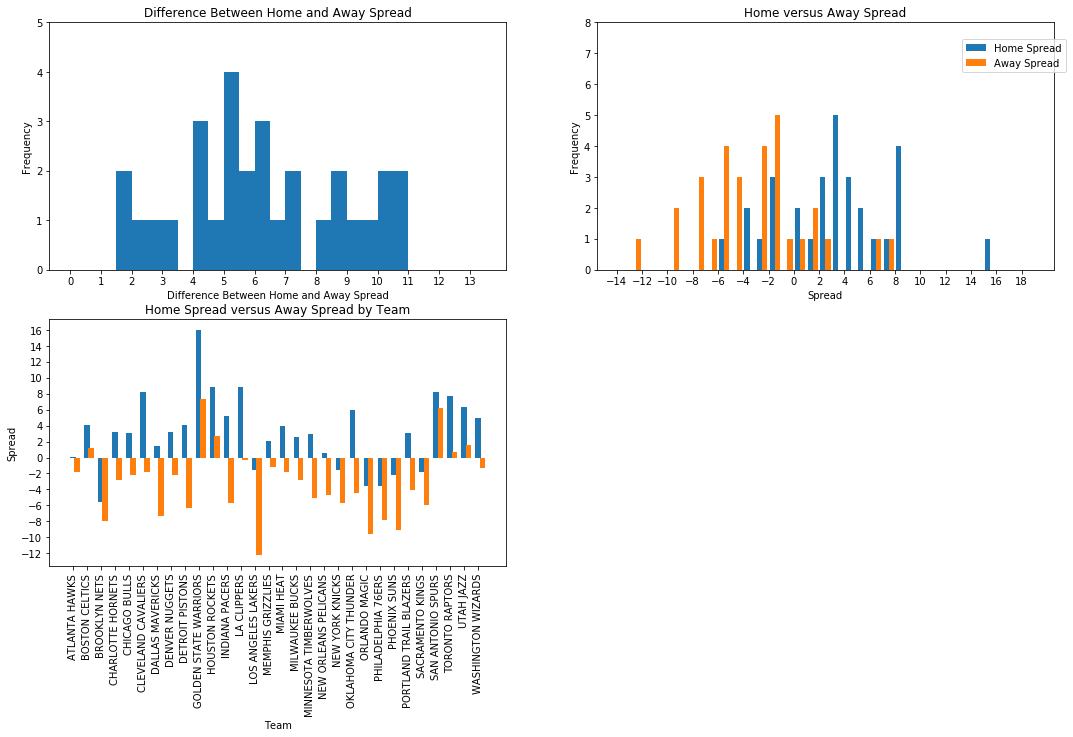

In [18]:
diff_in_spread = plt.figure(figsize = (18,10))

dis1 = diff_in_spread.add_subplot(2,2,1)

dis1.set_title('Difference Between Home and Away Spread')
dis1.set_xlabel('Difference Between Home and Away Spread')
dis1.set_ylabel('Frequency')
dis1.set_ylim(0,5)
dis1.set_xticks(np.arange(0,14,1))

n, bins, patches = dis1.hist(spread_by_team['DIFF IN SPREAD'], bins = np.arange(0,14,.5))

dis2 = diff_in_spread.add_subplot(2,2,2)
dis2.set_title('Home versus Away Spread')
dis2.set_xlabel('Spread')
dis2.set_ylabel('Frequency')
dis2.set_ylim(0,8)
dis2.set_xticks(np.arange(-14,20,2))
n, bins, patches = dis2.hist([spread_by_team['HOME SPREAD'], spread_by_team['AWAY SPREAD']], bins = np.arange(-14,20,1), label = ['Home Spread', 'Away Spread'])
dis2.legend(loc = (0.8,0.8))

dis3 = diff_in_spread.add_subplot(2,2,3)

dis3.set_title('Home Spread versus Away Spread by Team')
dis3.set_xlabel('Team')
dis3.set_ylabel('Spread')
dis3.set_yticks(np.arange(-16,20,2))
dis3.set_xticks(np.arange(len(spread_by_team)))
dis3.set_xticklabels(spread_by_team['TEAM'], rotation = 'vertical')

dis3.bar(left = np.arange(len(spread_by_team)), height = spread_by_team['HOME SPREAD'] , width = 0.4, data = spread_by_team)
dis3.bar(left = np.arange(len(spread_by_team))+0.3, height = spread_by_team['AWAY SPREAD'] , width = 0.4, data = spread_by_team)

In [19]:
HvA_spread_bins = np.arange(np.min(cleaned_basketball_data['SPREAD']) - 1,np.max(cleaned_basketball_data['SPREAD']) + 2,5)

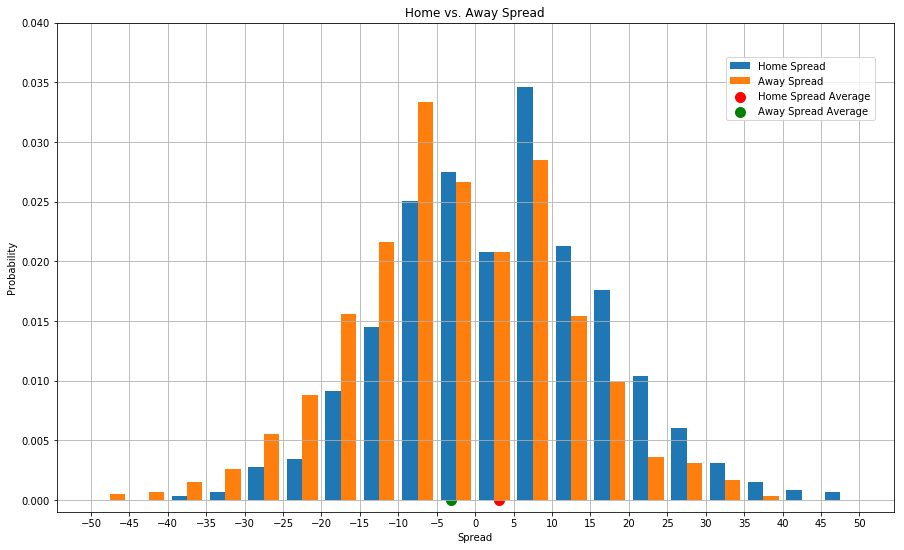

In [20]:
HvA_spread = plt.figure(figsize = (15,9))

hs1 = HvA_spread.add_subplot(1,1,1)
hs1.set_title('Home vs. Away Spread')
hs1.set_xlabel('Spread')
hs1.set_ylabel('Probability')
hs1.set_ylim(-0.001,0.04,0.005)
hs1.set_yticks(np.arange(0,0.045,0.005))
hs1.set_xticks(HvA_spread_bins)

n, bins, patches = hs1.hist([cleaned_home_games['HOME SPREAD'], cleaned_away_games['AWAY SPREAD']], bins = HvA_spread_bins, label = ['Home Spread', 'Away Spread'], normed = 1)
plt.scatter(np.mean(cleaned_home_games['HOME SPREAD']), 0, color=['r'], s = 100, label = 'Home Spread Average')
plt.scatter(np.mean(cleaned_away_games['AWAY SPREAD']), 0, color=['g'], s = 100, label = 'Away Spread Average')
hs1.grid()

hs1.legend(loc = (0.8,0.8))

Below we define some functions we will use in our analysis later on:

In [21]:
def permutation_test_continuous(df, variable, classes, repetitions):

    df = df.sort_values(classes)
    df = df.reset_index()
    
    #observed test statistic
    df = df[[variable, classes]]
    df_pivot = df.pivot_table(index=classes, values = variable, fill_value = 0)
    observed_stat = abs(df_pivot.iloc[0][0] - df_pivot.iloc[1][0])
    
    #simulate under the null hypo 
    meandiffs = []
    df_size = len(df)
    for i in np.arange(repetitions):
        
        #shuffle the dataframe by sampling with replacement
        shuffled_df = df.sample(df_size, replace=False)
        
        #reset the index so that the shuffled order is maintained
    
        shuffled_df = shuffled_df.reset_index()
        
        #create a new temp dataframe with the original classes
        #and the variable values in this shuffled order
        permuted_df = pd.DataFrame({classes : df[classes], variable : shuffled_df[variable]})
        permuted_df_pivot = permuted_df.pivot_table(index=classes, values = variable, fill_value = 0)
        
        #find the meandiff
        current_meandiff = (permuted_df_pivot.iloc[0][0] - permuted_df_pivot.iloc[1][0])
        meandiffs.append(current_meandiff)
        
    meandiffs = np.array(meandiffs)
    plt.hist(meandiffs, ec = 'black')
    plt.scatter(observed_stat, 0, s=30, color='g')
    return(meandiffs, observed_stat)

In [22]:
def permutation_test_continuous_2(df, variable, classes, repetitions):

    df = df.sort_values(classes)
    df = df.reset_index()
    
    #observed test statistic
    df = df[[variable, classes]]
    df_pivot = df.pivot_table(index=classes, values = variable, fill_value = 0)
    observed_stat = abs(df_pivot.iloc[0][0] - df_pivot.iloc[1][0])
    
    #simulate under the null hypo 
    meandiffs = []
    df_size = len(df)
    for i in np.arange(repetitions):
        
        #shuffle the dataframe by sampling with replacement
        shuffled_df = df.sample(df_size, replace=False)
        
        #reset the index so that the shuffled order is maintained
    
        shuffled_df = shuffled_df.reset_index()
        
        #create a new temp dataframe with the original classes
        #and the variable values in this shuffled order
        permuted_df = pd.DataFrame({classes : df[classes], variable : shuffled_df[variable]})
        permuted_df_pivot = permuted_df.pivot_table(index=classes, values = variable, fill_value = 0)
        
        #find the meandiff
        current_meandiff = (permuted_df_pivot.iloc[0][0] - permuted_df_pivot.iloc[1][0])
        meandiffs.append(current_meandiff)
        
    return(meandiffs, observed_stat)

In [23]:
def get_p_value(x,y):
    p_value = np.sum(x > y)/len(x)
    return p_value

# Hypothesis Test 1

We take the average of the home spread mean and the away spread mean. Then we take the difference between the home spread and the away spread to get the difference as our statistic.



Null Hypothesis: The home and away spread samples are drawn from the same underlying population; they look like random draws from the same set.
    
Alternative Hypothesis: The home spread is drawn from a underlying distribution with a higher mean than the distribution where the away spread is drawn from; they do not look like random draws from the same set.ly, it means that there is home advantage.

In [25]:
home_spread_mean = np.mean(cleaned_basketball_data[cleaned_basketball_data["HOME.TEAM"] == True]["SPREAD"])
away_spread_mean = np.mean(cleaned_basketball_data[cleaned_basketball_data["HOME.TEAM"] == False]["SPREAD"])
observed_diff = home_spread_mean - away_spread_mean
observed_diff

6.297560975609756

In [26]:
diffs = np.array([])
iterations = 5000

for i in np.arange(0, iterations):
    cleaned_basketball_data["SHUFFLED SPREAD"] = np.random.choice(cleaned_basketball_data["SPREAD"],len(cleaned_basketball_data["SPREAD"]))
    home_spread_mean = np.mean(cleaned_basketball_data[cleaned_basketball_data["HOME.TEAM"] == True]["SHUFFLED SPREAD"])
    away_spread_mean = np.mean(cleaned_basketball_data[cleaned_basketball_data["HOME.TEAM"] == False]["SHUFFLED SPREAD"])
    diff_mean = home_spread_mean - away_spread_mean
    diffs = np.append(diffs, diff_mean)

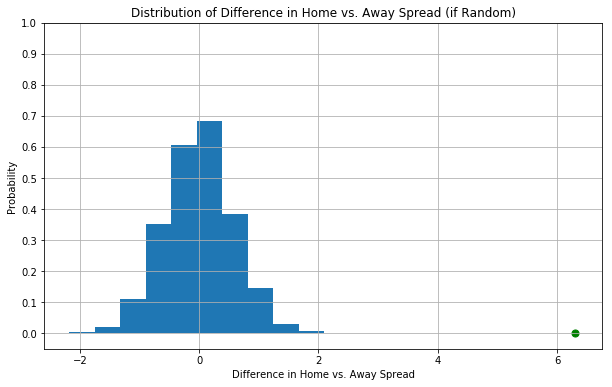

In [27]:
spread_diffs = plt.figure(figsize = (10,6))

sd1 = spread_diffs.add_subplot(1,1,1)
sd1.set_title('Distribution of Difference in Home vs. Away Spread (if Random)')
sd1.set_xlabel('Difference in Home vs. Away Spread')
sd1.set_ylabel('Probability')
sd1.set_ylim(-0.05,1)
sd1.set_yticks(np.arange(0,1.1,.1))
n, bins, patches = sd1.hist(diffs, normed = 1)
plt.scatter(observed_diff, 0, s=50, color='g')
sd1.grid()

In [28]:
p_value = get_p_value(diffs, observed_diff)
p_value

0.0

Since the p-value for our hypothesis is less than 0.05 and since we can see that our actual difference in home and away spread of about 6.3 is not even on our histogram, we are able to reject the null hypothesis that the home and away spreads of basketball games are drawn from the same population.

Our hypothesis test above is the same as running the simulation right below this:

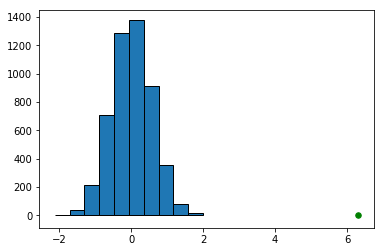

In [29]:
(simulated_league_spread_diff, observed_league_spread_diff) = permutation_test_continuous(cleaned_basketball_data, 'SPREAD', 'HOME.TEAM', 5000)

In [30]:
league_spread_diff_p_value = get_p_value(simulated_league_spread_diff, observed_league_spread_diff)
league_spread_diff_p_value

0.0

# Hypothesis Test 2

We will perform a hypothesis test to see if the difference in home and away spread for the Golden State Warriors is from the same population as the rest of the league or not.

Null Hypothesis: The difference between home and away spread for the Golden State Warriors and the difference between the home and away spread for all the teams in the league are drawn from the same underlying population; they look like random draws from the same set.
    
Alternative Hypothesis: The difference between home and away spread for the Golden State Warriors is drawn from a underlying distribution with a higher mean than the distribution where the difference between home and away spread for all the teams in the league is drawn from; they do not look like random draws from the same set.

In [32]:
real_gs_diff = np.mean(cleaned_home_games[cleaned_home_games['TEAM'] == 'GOLDEN STATE WARRIORS']['HOME SPREAD']) - np.mean(cleaned_away_games[cleaned_away_games['TEAM'] == 'GOLDEN STATE WARRIORS']['AWAY SPREAD'])
real_gs_diff

8.634146341463413

In [33]:
team_diffs = np.array([])
iterations = 20000

for i in np.arange(0, iterations):
    #we take all of the home spreads and all of the away spreads, and then randomly assign 41 home games and 41 away games to that team because each team plays 82 games per season
    team_home_spread_mean = np.mean(cleaned_home_games['HOME SPREAD'].sample(41, replace = False))
    team_away_spread_mean = np.mean(cleaned_away_games['AWAY SPREAD'].sample(41, replace = False)) 
    team_diff = team_home_spread_mean - team_away_spread_mean
    team_diffs = np.append(team_diffs, team_diff)

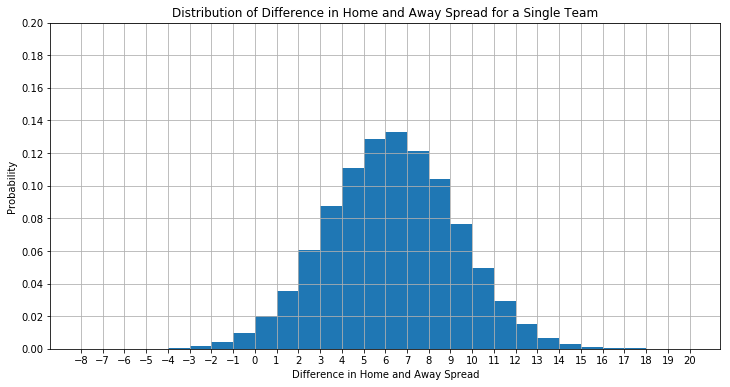

In [34]:
spread_team_diff = plt.figure(figsize = (12,6))

std1 = spread_team_diff.add_subplot(1,1,1)
std1.set_title('Distribution of Difference in Home and Away Spread for a Single Team')
std1.set_xlabel('Difference in Home and Away Spread')
std1.set_ylabel('Probability')
std1.set_yticks(np.arange(0,1,.02))
std1.set_ylim(0,0.2)
std1.set_xticks(np.arange(round(np.min(team_diffs)-2), np.max(team_diffs)+3, 1))
n, bins, patches = std1.hist(team_diffs, bins = np.arange(round(np.min(team_diffs)-2), np.max(team_diffs)+3, 1), normed = 1)
std1.grid()

In [35]:
np.mean(team_diffs)

6.300515853658537

In [36]:
p_value_gs = get_p_value(team_diffs, real_gs_diff)
p_value_gs

0.21485

Since the p-value for our hypothesis test is above 0.05, we fail to reject our null hypothesis.

Now we intend to compute a confidence interval for the difference between the home spread and the away spread that tells us the cutoff for when there is home court advantage

In [37]:
upper_bound = np.percentile(team_diffs, 97.5)

In [38]:
lower_bound = np.percentile(team_diffs, 2.5)

In [39]:
print("The confidence interval of the difference between the home spread and the away spread for a given team is [" + str(lower_bound) + ',' + str(upper_bound) + "]")

The confidence interval of the difference between the home spread and the away spread for a given team is [0.4878048780487805,12.097560975609756]



The null hypothesis in the 2nd test is not rejected, which means that  every single randomly selected team falls within the sample population. The confidence interval here shows a minimum and maximum difference between the home and away spread for a team in the league that plays an entire season (41 home games and 41 away homes)

In [40]:
ordered_diff_spread_by_team = spread_by_team.sort_values('DIFF IN SPREAD', ascending = False)
ordered_diff_spread_by_team.head()

,TEAM,HOME SPREAD,AWAY SPREAD,DIFF IN SPREAD
11,INDIANA PACERS,5.219512,-5.658537,10.878049
13,LOS ANGELES LAKERS,-1.560976,-12.195122,10.634146
20,OKLAHOMA CITY THUNDER,5.951220,-4.439024,10.390244
8,DETROIT PISTONS,4.048780,-6.292683,10.341463
5,CLEVELAND CAVALIERS,8.170732,-1.804878,9.975610


In [41]:
np.max(spread_by_team['DIFF IN SPREAD'])

10.878048780487806

In [42]:
np.min(spread_by_team['DIFF IN SPREAD'])

1.902439024390244

The confidence interval here shows a boubdary of the home and away spread for a team in the league that plays an entire season (41 home games and 41 away homes). The confidence interval includes both the maximum value and minimum value of the difference between the home and away spread of all 30 teams, which is 10.88 and 1.90 respectively. The statistic for all teams fall within the confidence interval of the league. Thus we can come to the conclusion that no teams are statistically significant from the league average for difference between the home and away spread. 

# Hypothesis Testing 3

We will perform a hypothesis test to see if the home and away spread for the Golden State Warriors is from the same population or not.

Null Hypothesis: The home and away spread for the Golden State Warriors are drawn from the same underlying population; they look like random draws from the same set.
    
Alternative Hypothesis: The home spread of Golden State Warriors is drawn from a underlying distribution with a higher mean than the distribution where the away spread of Golden State Warriors is drawn from; they do not look like random draws from the same set.


In [43]:
gs_sample_spread_diffs = np.array([])
iterations = 5000

for i in np.arange(iterations):
    home_spread_gs = cleaned_home_games[cleaned_home_games['TEAM'] =='GOLDEN STATE WARRIORS']
    away_spread_gs = cleaned_away_games[cleaned_away_games['TEAM'] =='GOLDEN STATE WARRIORS']
    gs_home_sample_spread_mean = np.mean(home_spread_gs['HOME SPREAD'].sample(41, replace = True))
    gs_away_sample_spread_mean = np.mean(away_spread_gs['AWAY SPREAD'].sample(41, replace = True))
    gs_sample_spread_diff = gs_home_sample_spread_mean - gs_away_sample_spread_mean
    gs_sample_spread_diffs = np.append(gs_sample_spread_diffs, gs_sample_spread_diff)

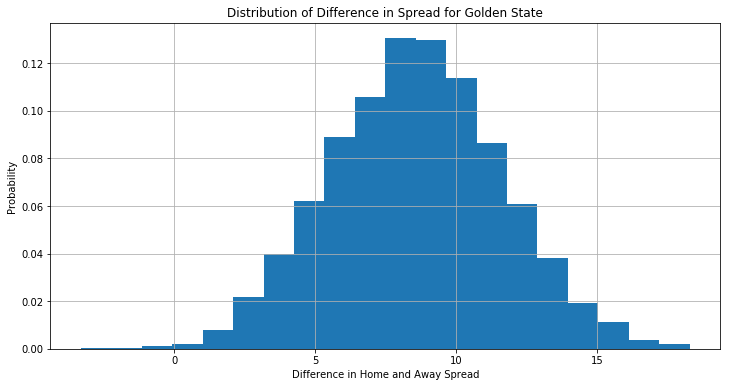

In [44]:
gs_sample_spread_diff_dist = plt.figure(figsize = (12,6))

gssdd1 = gs_sample_spread_diff_dist.add_subplot(1,1,1)
gssdd1.set_title('Distribution of Difference in Spread for Golden State')
gssdd1.set_ylabel('Probability')
gssdd1.set_xlabel('Difference in Home and Away Spread')
gssdd1.hist(gs_sample_spread_diffs, bins = 20, normed = 1)
gssdd1.grid()

In [45]:
#p-valus for this test is actually 1 minus our p-value function
p_value_gs = 1 - get_p_value(gs_sample_spread_diffs, 0)
p_value_gs

0.0021999999999999797

Thus, we decided to calculate the p-value for all 30 teams to see whether their homad and away spread are drawn from the same underlying population.

In [46]:
def diff_spread_p_value_single_team(team, iterations):
    team_sample_spread_diffs = np.array([])
    iterations = iterations

    for i in np.arange(iterations):
        home_spread_team = cleaned_home_games[cleaned_home_games['TEAM'] == team]
        away_spread_team = cleaned_away_games[cleaned_away_games['TEAM'] == team]
        team_home_sample_spread_mean = np.mean(home_spread_team['HOME SPREAD'].sample(41, replace = True))
        team_away_sample_spread_mean = np.mean(away_spread_team['AWAY SPREAD'].sample(41, replace = True))
        team_sample_spread_diff = team_home_sample_spread_mean - team_away_sample_spread_mean
        team_sample_spread_diffs = np.append(team_sample_spread_diffs, team_sample_spread_diff)
    return team_sample_spread_diffs

Below is the code we used to obtain the csv called: "p_value_spread_team.csv"
We commented out as the code takes about 30 minutes to run

In [ ]:
#for each team
#p_values_team_diff_spread = []
#for t in teams:
    #team_sample_spread_diffs = diff_spread_p_value_single_team(t, 5000)
    #p_value_team = 1 - get_p_value(team_sample_spread_diffs, 0)
    #p_values_team_diff_spread.append(p_value_team)

In [ ]:
#spread_result_df = pd.DataFrame({'teams' : teams, 'p_values_diff_spread' : p_values_team_diff_spread})
#spread_result_df

In [ ]:
#spread_result_df.to_csv("p_value_spread_team.csv")

In [47]:
spread_result_df = pd.read_csv("p_value_spread_team.csv")

In [48]:
spread_result_df = spread_result_df.drop('Unnamed: 0', axis = 1)
spread_result_df

,p_values_diff_spread,teams
0,0.2606,ATLANTA HAWKS
1,0.1282,BOSTON CELTICS
2,0.2018,BROOKLYN NETS
3,0.0114,CHARLOTTE HORNETS
4,0.0546,CHICAGO BULLS
5,0.0002,CLEVELAND CAVALIERS
6,0.0022,DALLAS MAVERICKS
7,0.0312,DENVER NUGGETS
8,0.0018,DETROIT PISTONS
9,0.0014,GOLDEN STATE WARRIORS


In [49]:
spread_by_team['p_value_diff_spread'] = spread_result_df['p_values_diff_spread']
spread_by_team.head()

,TEAM,HOME SPREAD,AWAY SPREAD,DIFF IN SPREAD,p_value_diff_spread
0,ATLANTA HAWKS,0.097561,-1.804878,1.902439,0.2606
1,BOSTON CELTICS,4.073171,1.195122,2.878049,0.1282
2,BROOKLYN NETS,-5.536585,-7.926829,2.390244,0.2018
3,CHARLOTTE HORNETS,3.219512,-2.829268,6.048780,0.0114
4,CHICAGO BULLS,3.048780,-2.195122,5.243902,0.0546


In [50]:
spread_by_team_significant_teams = spread_by_team[spread_by_team['p_value_diff_spread'] <= 0.05]
spread_by_team_significant_teams.head()

,TEAM,HOME SPREAD,AWAY SPREAD,DIFF IN SPREAD,p_value_diff_spread
3,CHARLOTTE HORNETS,3.219512,-2.829268,6.048780,0.0114
5,CLEVELAND CAVALIERS,8.170732,-1.804878,9.975610,0.0002
6,DALLAS MAVERICKS,1.487805,-7.341463,8.829268,0.0022
7,DENVER NUGGETS,3.170732,-2.146341,5.317073,0.0312
8,DETROIT PISTONS,4.048780,-6.292683,10.341463,0.0018


The following 22 teams have a significant difference between the home and away spread because the p-value for these 22 teams is below the significance level 0.05

In [51]:
significant_teams_diff_spread = spread_result_df[spread_result_df['p_values_diff_spread'] <= 0.05]['teams']
significant_teams_diff_spread

3          CHARLOTTE HORNETS
5        CLEVELAND CAVALIERS
6           DALLAS MAVERICKS
7             DENVER NUGGETS
8            DETROIT PISTONS
9      GOLDEN STATE WARRIORS
10           HOUSTON ROCKETS
11            INDIANA PACERS
12               LA CLIPPERS
13        LOS ANGELES LAKERS
15                MIAMI HEAT
16           MILWAUKEE BUCKS
17    MINNESOTA TIMBERWOLVES
18      NEW ORLEANS PELICANS
19           NEW YORK KNICKS
20     OKLAHOMA CITY THUNDER
21             ORLANDO MAGIC
23              PHOENIX SUNS
24    PORTLAND TRAIL BLAZERS
27           TORONTO RAPTORS
28                 UTAH JAZZ
29        WASHINGTON WIZARDS
Name: teams, dtype: object

The following 8 teams do not have a significant difference between the home and away spread because the p-value for these 8 teams is above the significance level 0.05

In [52]:
insignificant_teams_diff_spread = spread_result_df[spread_result_df['p_values_diff_spread'] >= 0.05]['teams']
insignificant_teams_diff_spread

0          ATLANTA HAWKS
1         BOSTON CELTICS
2          BROOKLYN NETS
4          CHICAGO BULLS
14     MEMPHIS GRIZZLIES
22    PHILADELPHIA 76ERS
25      SACRAMENTO KINGS
26     SAN ANTONIO SPURS
Name: teams, dtype: object

In [53]:
ordered_diff_spread_by_team_significant_teams = spread_by_team_significant_teams.sort_values('DIFF IN SPREAD', ascending = False)
ordered_diff_spread_by_team_significant_teams.head()

,TEAM,HOME SPREAD,AWAY SPREAD,DIFF IN SPREAD,p_value_diff_spread
11,INDIANA PACERS,5.219512,-5.658537,10.878049,0.0000
13,LOS ANGELES LAKERS,-1.560976,-12.195122,10.634146,0.0000
20,OKLAHOMA CITY THUNDER,5.951220,-4.439024,10.390244,0.0000
8,DETROIT PISTONS,4.048780,-6.292683,10.341463,0.0018
5,CLEVELAND CAVALIERS,8.170732,-1.804878,9.975610,0.0002


The hypothesis test run above is the same as running the test directly below:

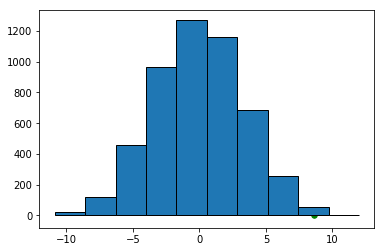

In [54]:
(simulated_single_team_spread_diff, observed_gs_spread_diff) = permutation_test_continuous(cleaned_basketball_data[cleaned_basketball_data['TEAM'] == 'GOLDEN STATE WARRIORS'], 'SPREAD', 'HOME.TEAM', 5000)

In [55]:
p_value_gs_spread = get_p_value(simulated_single_team_spread_diff, observed_gs_spread_diff)
p_value_gs_spread

0.0042

# Testing Other Statistics Besides Spread

The Indiana Pacers is the team with the highest difference between the average home spread and the away home spread. We decided to look at factors that affect this statistic.

The 3 p-values tests below are the examples that demonstrate whether these statistics ("PTS.TEAM",'REB.TEAM' and "AST.TEAM") have a significance on impacting the difference in spread. Later in the notebook, a for loop will be run to demonstrate whether each single statistic in the csv file has an impact on the difference between the home and the away spread.

In [56]:
(sim_stat_pacers_pts, observed_stat_pacers_pts) = permutation_test_continuous_2(cleaned_basketball_data[cleaned_basketball_data["TEAM"] == "INDIANA PACERS"], 'PTS.TEAM', 'HOME.TEAM', 2000)

In [57]:
p_value_pacers_pts = np.sum(sim_stat_pacers_pts > observed_stat_pacers_pts) / len(sim_stat_pacers_pts)
p_value_pacers_pts

0.063

In [58]:
(sim_stat_pacers_reb, observed_stat_pacers_reb) = permutation_test_continuous_2(cleaned_basketball_data[cleaned_basketball_data["TEAM"] == "INDIANA PACERS"], 'REB.TEAM', 'HOME.TEAM', 2000)

In [59]:
p_value_pacers_reb = np.sum(sim_stat_pacers_reb > observed_stat_pacers_reb) / len(sim_stat_pacers_reb)
p_value_pacers_reb

0.2595

In [60]:
(sim_stat_pacers_ast, observed_stat_pacers_ast) = permutation_test_continuous_2(cleaned_basketball_data[cleaned_basketball_data["TEAM"] == "INDIANA PACERS"], 'AST.TEAM', 'HOME.TEAM', 2000)

In [61]:
p_value_pacers_ast = np.sum(sim_stat_pacers_ast > observed_stat_pacers_ast) / len(sim_stat_pacers_ast)
p_value_pacers_ast

0.066

In [62]:
teams = np.unique(cleaned_basketball_data['TEAM'])
teams

array(['ATLANTA HAWKS', 'BOSTON CELTICS', 'BROOKLYN NETS',
       'CHARLOTTE HORNETS', 'CHICAGO BULLS', 'CLEVELAND CAVALIERS',
       'DALLAS MAVERICKS', 'DENVER NUGGETS', 'DETROIT PISTONS',
       'GOLDEN STATE WARRIORS', 'HOUSTON ROCKETS', 'INDIANA PACERS',
       'LA CLIPPERS', 'LOS ANGELES LAKERS', 'MEMPHIS GRIZZLIES',
       'MIAMI HEAT', 'MILWAUKEE BUCKS', 'MINNESOTA TIMBERWOLVES',
       'NEW ORLEANS PELICANS', 'NEW YORK KNICKS', 'OKLAHOMA CITY THUNDER',
       'ORLANDO MAGIC', 'PHILADELPHIA 76ERS', 'PHOENIX SUNS',
       'PORTLAND TRAIL BLAZERS', 'SACRAMENTO KINGS', 'SAN ANTONIO SPURS',
       'TORONTO RAPTORS', 'UTAH JAZZ', 'WASHINGTON WIZARDS'], dtype=object)

In [63]:
stats = list(cleaned_basketball_data.columns[3:18]) + list(cleaned_basketball_data.columns[-3:-1])
stats = np.array(stats)
stats

array(['FGM.TEAM', 'FGA.TEAM', 'X3PM.TEAM', 'X3PA.TEAM', 'FTA.TEAM',
       'FTM.TEAM', 'OREB.TEAM', 'DREB.TEAM', 'REB.TEAM', 'AST.TEAM',
       'TOV.TEAM', 'STL.TEAM', 'BLK.TEAM', 'PF.TEAM', 'PTS.TEAM',
       'FG%.TEAM', 'X3FG%.TEAM'], dtype='<U10')

Below is the code we used to obtain the csv called: "p_value_stats_pacers.csv"

In [ ]:
#p_values_pacers = []
#for s in stats:
        #(sim_stat, observed_stat) = permutation_test_continuous_2(cleaned_basketball_data[cleaned_basketball_data["TEAM"] == 'INDIANA PACERS'], s, 'HOME.TEAM', 2000)
        #p_value_stat = np.sum(sim_stat>observed_stat) / len(sim_stat)
        #p_values_pacers.append(p_value_stat)

In [ ]:
#p_value_stats_pacers_result_df = pd.DataFrame({'stats' : stats, 'p_values_pacers' : p_values_pacers})
#p_value_stats_pacers_result_df

In [70]:
p_value_stats_pacers_result_df.to_csv("p_value_stats_pacers.csv")

In [71]:
p_value_stats_pacers_result_df = pd.read_csv("p_value_stats_pacers.csv")

The null and alternative hypotheses for the p-values in the table below are identical to our null and alternative hypotheses for hypothesis test 3, except change the team name to the Indiana Pacers, and change the spread statistic to the approriate statistic.

In [72]:
p_value_stats_pacers_result_df = p_value_stats_pacers_result_df.drop('Unnamed: 0', axis = 1)
p_value_stats_pacers_result_df

,Unnamed: 0.1,p_values_pacers,stats
0,0,0.0180,FGM.TEAM
1,1,0.1870,FGA.TEAM
2,2,0.3400,X3PM.TEAM
3,3,0.4770,X3PA.TEAM
4,4,0.2850,FTA.TEAM
5,5,0.2850,FTM.TEAM
6,6,0.1345,OREB.TEAM
7,7,0.0795,DREB.TEAM
8,8,0.2410,REB.TEAM
9,9,0.0580,AST.TEAM


In [73]:
significant_p_value_stats_pacers = p_value_stats_pacers_result_df[p_value_stats_pacers_result_df["p_values_pacers"]<0.05]
significant_p_value_stats_pacers

,Unnamed: 0.1,p_values_pacers,stats
0,0,0.018,FGM.TEAM
10,10,0.006,TOV.TEAM
12,12,0.001,BLK.TEAM


Viewing from the dataframe of the p-value of all statistics for Pacers, we can see that field goals made, turnovers, and blocks are three factors that may contribute to the difference between the home and away spread of Indiana Pacers.

#### WARNING: Running the loop below with more than 100 entries may take a while

Below is the code we used to obtain the csv called: "full_results.csv"

In [75]:
full_result_df = pd.DataFrame({'stats' : stats})

for t in teams:
    p_values_single_team = []
    for s in stats:
        (sim_stat, observed_stat) = permutation_test_continuous_2(cleaned_basketball_data[cleaned_basketball_data["TEAM"] == t], s, 'HOME.TEAM', 100)
        p_value_stat = np.sum(sim_stat>observed_stat) / len(sim_stat)
        p_values_single_team.append(p_value_stat)
    full_result_df['p-values ' + t] = p_values_single_team
full_result_df

,stats,p-values ATLANTA HAWKS,p-values BOSTON CELTICS,p-values BROOKLYN NETS,p-values CHARLOTTE HORNETS,p-values CHICAGO BULLS,p-values CLEVELAND CAVALIERS,p-values DALLAS MAVERICKS,p-values DENVER NUGGETS,p-values DETROIT PISTONS,...,p-values OKLAHOMA CITY THUNDER,p-values ORLANDO MAGIC,p-values PHILADELPHIA 76ERS,p-values PHOENIX SUNS,p-values PORTLAND TRAIL BLAZERS,p-values SACRAMENTO KINGS,p-values SAN ANTONIO SPURS,p-values TORONTO RAPTORS,p-values UTAH JAZZ,p-values WASHINGTON WIZARDS
0,FGM.TEAM,0.12,0.16,0.26,0.18,0.46,0.01,0.41,0.08,0.13,...,0.00,0.11,0.27,0.12,0.03,0.24,0.43,0.04,0.22,0.37
1,FGA.TEAM,0.07,0.20,0.15,0.32,0.07,0.23,0.27,0.39,0.36,...,0.41,0.22,0.16,0.45,0.22,0.13,0.17,0.31,0.04,0.10
2,X3PM.TEAM,0.45,0.03,0.33,0.41,0.37,0.44,0.27,0.14,0.13,...,0.19,0.28,0.17,0.12,0.04,0.05,0.10,0.06,0.03,0.03
3,X3PA.TEAM,0.32,0.38,0.26,0.41,0.08,0.32,0.09,0.25,0.37,...,0.25,0.09,0.27,0.08,0.08,0.11,0.36,0.12,0.13,0.21
4,FTA.TEAM,0.07,0.61,0.20,0.12,0.02,0.43,0.00,0.48,0.46,...,0.39,0.15,0.25,0.31,0.12,0.07,0.42,0.02,0.17,0.27
5,FTM.TEAM,0.11,0.35,0.25,0.00,0.08,0.28,0.01,0.40,0.30,...,0.41,0.07,0.37,0.41,0.21,0.23,0.41,0.05,0.11,0.52
6,OREB.TEAM,0.05,0.01,0.02,0.33,0.01,0.21,0.20,0.13,0.52,...,0.06,0.08,0.23,0.11,0.53,0.04,0.04,0.06,0.06,0.18
7,DREB.TEAM,0.06,0.12,0.20,0.43,0.50,0.02,0.00,0.49,0.01,...,0.12,0.18,0.11,0.02,0.37,0.47,0.15,0.28,0.13,0.24
8,REB.TEAM,0.47,0.03,0.06,0.27,0.17,0.01,0.00,0.25,0.05,...,0.45,0.02,0.24,0.02,0.43,0.28,0.32,0.07,0.47,0.45
9,AST.TEAM,0.00,0.00,0.13,0.02,0.03,0.00,0.44,0.00,0.00,...,0.14,0.10,0.01,0.19,0.06,0.38,0.01,0.05,0.23,0.03


In [76]:
full_result_df.to_csv("full_results.csv")

In [77]:
full_result_df = pd.read_csv("full_results.csv")
full_result_df = full_result_df.drop('Unnamed: 0', axis = 1)
full_result_df

,stats,p-values ATLANTA HAWKS,p-values BOSTON CELTICS,p-values BROOKLYN NETS,p-values CHARLOTTE HORNETS,p-values CHICAGO BULLS,p-values CLEVELAND CAVALIERS,p-values DALLAS MAVERICKS,p-values DENVER NUGGETS,p-values DETROIT PISTONS,...,p-values OKLAHOMA CITY THUNDER,p-values ORLANDO MAGIC,p-values PHILADELPHIA 76ERS,p-values PHOENIX SUNS,p-values PORTLAND TRAIL BLAZERS,p-values SACRAMENTO KINGS,p-values SAN ANTONIO SPURS,p-values TORONTO RAPTORS,p-values UTAH JAZZ,p-values WASHINGTON WIZARDS
0,FGM.TEAM,0.12,0.16,0.26,0.18,0.46,0.01,0.41,0.08,0.13,...,0.00,0.11,0.27,0.12,0.03,0.24,0.43,0.04,0.22,0.37
1,FGA.TEAM,0.07,0.20,0.15,0.32,0.07,0.23,0.27,0.39,0.36,...,0.41,0.22,0.16,0.45,0.22,0.13,0.17,0.31,0.04,0.10
2,X3PM.TEAM,0.45,0.03,0.33,0.41,0.37,0.44,0.27,0.14,0.13,...,0.19,0.28,0.17,0.12,0.04,0.05,0.10,0.06,0.03,0.03
3,X3PA.TEAM,0.32,0.38,0.26,0.41,0.08,0.32,0.09,0.25,0.37,...,0.25,0.09,0.27,0.08,0.08,0.11,0.36,0.12,0.13,0.21
4,FTA.TEAM,0.07,0.61,0.20,0.12,0.02,0.43,0.00,0.48,0.46,...,0.39,0.15,0.25,0.31,0.12,0.07,0.42,0.02,0.17,0.27
5,FTM.TEAM,0.11,0.35,0.25,0.00,0.08,0.28,0.01,0.40,0.30,...,0.41,0.07,0.37,0.41,0.21,0.23,0.41,0.05,0.11,0.52
6,OREB.TEAM,0.05,0.01,0.02,0.33,0.01,0.21,0.20,0.13,0.52,...,0.06,0.08,0.23,0.11,0.53,0.04,0.04,0.06,0.06,0.18
7,DREB.TEAM,0.06,0.12,0.20,0.43,0.50,0.02,0.00,0.49,0.01,...,0.12,0.18,0.11,0.02,0.37,0.47,0.15,0.28,0.13,0.24
8,REB.TEAM,0.47,0.03,0.06,0.27,0.17,0.01,0.00,0.25,0.05,...,0.45,0.02,0.24,0.02,0.43,0.28,0.32,0.07,0.47,0.45
9,AST.TEAM,0.00,0.00,0.13,0.02,0.03,0.00,0.44,0.00,0.00,...,0.14,0.10,0.01,0.19,0.06,0.38,0.01,0.05,0.23,0.03


# Model Building for Pacers

Now, we will build a model that will help us determine the factors that impact the Indiana Pacers' spread.

In [78]:
cleaned_basketball_data_pacers = cleaned_basketball_data[cleaned_basketball_data['TEAM'] == 'INDIANA PACERS']

We will look at the correlations between all of the boxscore statistics with the spread of the games for the Indiana Pacers.

In [79]:
corr_with_spread_pacers = cleaned_basketball_data_pacers.corr()["SPREAD"]

In order to narrow down our choices for predictors while making sure every factor is relatively significant, we originally looked at predictors with a correlation of greater than 0.4 with spread.

In [80]:
significant_corr_with_spread_pacers = corr_with_spread_pacers[abs(corr_with_spread_pacers) > 0.4]
significant_corr_with_spread_pacers

FGM.TEAM     0.426748
DREB.TEAM    0.483224
FGM.OPP     -0.596839
AST.OPP     -0.593660
PTS.OPP     -0.688580
SPREAD       1.000000
FG%.TEAM     0.450456
Name: SPREAD, dtype: float64

We did not use the PTS.OPP or SPREAD predictors since those predictors either are the spread or are part of the equation for spread and we wanted to try to build a model to predict spread based off other components of the game.

In [81]:
def standardize(anylist):
    '''convert any array of numbers to std units '''
    return (anylist - np.mean(anylist)) / np.std(anylist)

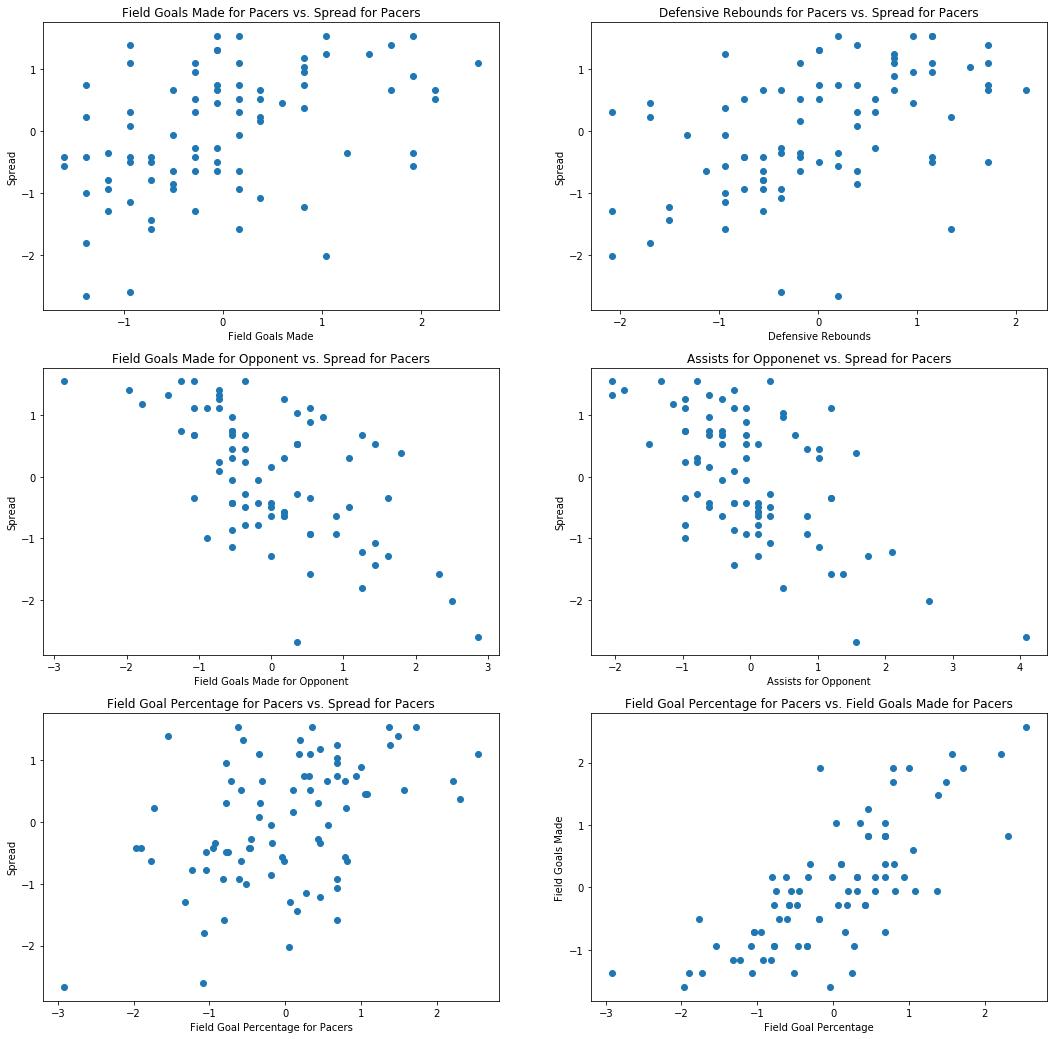

In [82]:
scatter_plot_pacers = plt.figure(figsize = (18,18))

spp1 = scatter_plot_pacers.add_subplot(3,2,1)
spp1.set_title('Field Goals Made for Pacers vs. Spread for Pacers')
spp1.set_ylabel('Spread')
spp1.set_xlabel('Field Goals Made')
spp1.scatter(standardize(cleaned_basketball_data_pacers['FGM.TEAM']), standardize(cleaned_basketball_data_pacers['SPREAD']))

spp2 = scatter_plot_pacers.add_subplot(3,2,2)
spp2.set_title('Defensive Rebounds for Pacers vs. Spread for Pacers')
spp2.set_ylabel('Spread')
spp2.set_xlabel('Defensive Rebounds')
spp2.scatter(standardize(cleaned_basketball_data_pacers['DREB.TEAM']), standardize(cleaned_basketball_data_pacers['SPREAD']))

spp3 = scatter_plot_pacers.add_subplot(3,2,3)
spp3.set_title('Field Goals Made for Opponent vs. Spread for Pacers')
spp3.set_ylabel('Spread')
spp3.set_xlabel('Field Goals Made for Opponent')
spp3.scatter(standardize(cleaned_basketball_data_pacers['FGM.OPP']), standardize(cleaned_basketball_data_pacers['SPREAD']))

spp4 = scatter_plot_pacers.add_subplot(3,2,4)
spp4.set_title('Assists for Opponenet vs. Spread for Pacers')
spp4.set_ylabel('Spread')
spp4.set_xlabel('Assists for Opponent')
spp4.scatter(standardize(cleaned_basketball_data_pacers['AST.OPP']), standardize(cleaned_basketball_data_pacers['SPREAD']))

spp5 = scatter_plot_pacers.add_subplot(3,2,5)
spp5.set_title('Field Goal Percentage for Pacers vs. Spread for Pacers')
spp5.set_ylabel('Spread')
spp5.set_xlabel('Field Goal Percentage for Pacers')
spp5.scatter(standardize(cleaned_basketball_data_pacers['FG%.TEAM']), standardize(cleaned_basketball_data_pacers['SPREAD']))

spp6 = scatter_plot_pacers.add_subplot(3,2,6)
spp6.set_title('Field Goal Percentage for Pacers vs. Field Goals Made for Pacers')
spp6.set_ylabel('Field Goals Made')
spp6.set_xlabel('Field Goal Percentage')
spp6.scatter(standardize(cleaned_basketball_data_pacers['FG%.TEAM']), standardize(cleaned_basketball_data_pacers['FGM.TEAM']))

In [83]:
cleaned_basketball_data_pacers.corr()['FG%.TEAM'].head()

FGM.TEAM     0.752470
FGA.TEAM    -0.292517
X3PM.TEAM    0.200068
X3PA.TEAM   -0.174488
FTA.TEAM    -0.001503
Name: FG%.TEAM, dtype: float64

We also decided to remove FGM.TEAM from candidate predictors since it has a correlation of about 0.75 with FG%.TEAM and FG%.TEAM has a higher correlation with spread than FGM.TEAM does so we decided to use FG%.TEAM in our model instead of FGM.TEAM. Also, both these variables have somewhat linear relationships with spread based on the scatterplots, but we believe that the scatter plot for FG%.TEAM vs. Spread shows a more linear relationship than the scatter plot for FGM.TEAM vs. Spread. We also believe that the scatter plots for the other three variables (DREB.TEAM, FGM.OPP, AST.OPP) showed a somewhat linear relationship with the spread so we included them in our model as well.

In [84]:
import statsmodels.api as sm

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [85]:
X = cleaned_basketball_data_pacers[['DREB.TEAM', 'FGM.OPP', 'AST.OPP', 'FG%.TEAM']]
y = cleaned_basketball_data_pacers['SPREAD']  
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SPREAD   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     54.28
Date:                Mon, 24 Dec 2018   Prob (F-statistic):           1.15e-21
Time:                        20:18:25   Log-Likelihood:                -276.45
No. Observations:                  82   AIC:                             562.9
Df Residuals:                      77   BIC:                             574.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.0628     11.223     -3.659      0.000     -63.410     -18.716
DREB.TEAM      0.7334      0.162      4.519      0.000       0.410       1.057
FGM.OPP       -0.7984      0.226     -3.536      0.001      -1.248      -0.349
AST.OPP       -0.7724      0.221     -3.489      0.001      -1.213      -0.332
FG%.TEAM     137.9383     16.233      8.498      0.000     105.615     170.261
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.462
Skew:                          -0.203   Prob(JB):                        0.292
Kurtosis:                       2.255   Cond. No.                     1.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our final model for spread for the Indiana Pacers is:

SPREAD = -41.0628 + 0.7334 x DREB.TEAM - 0.7984 x FGM.OPP -  x AST.OPP + 137.9383 x FG%.TEAM

# Model Building for the League

In [86]:
corr_with_spread_league = cleaned_basketball_data.corr()["SPREAD"]
corr_with_spread_league.head()

FGM.TEAM     0.511724
FGA.TEAM    -0.008567
X3PM.TEAM    0.351164
X3PA.TEAM    0.069423
FTA.TEAM     0.118424
Name: SPREAD, dtype: float64

In [87]:
significant_corr_with_spread = corr_with_spread_league[abs(corr_with_spread_league) > 0.4]
significant_corr_with_spread

FGM.TEAM      0.511724
DREB.TEAM     0.429891
AST.TEAM      0.410650
PTS.TEAM      0.577876
FGM.OPP      -0.511724
DREB.OPP     -0.429891
AST.OPP      -0.410650
PTS.OPP      -0.577876
SPREAD        1.000000
FG%.TEAM      0.559772
X3FG%.TEAM    0.423253
Name: SPREAD, dtype: float64

We did not use the PTS.TEAM, PTS.OPP or SPREAD predictors since those predictors either are the spread or are part of the equation for spread and we wanted to try to build a model to predict spread based off other components of the game. We also decided to remove FGM.TEAM from candidate predictors since it is correlated with FG%.TEAM and FG%.TEAM has a higher correlation with spread than FGM.TEAM does so we decided to use FG%.TEAM in our model instead of FGM.TEAM. We also removed X3FG%.TEAM from candidate predictors since it is part of the equation for FG%.TEAM and FG%.TEAM has a higher correlation with spread.

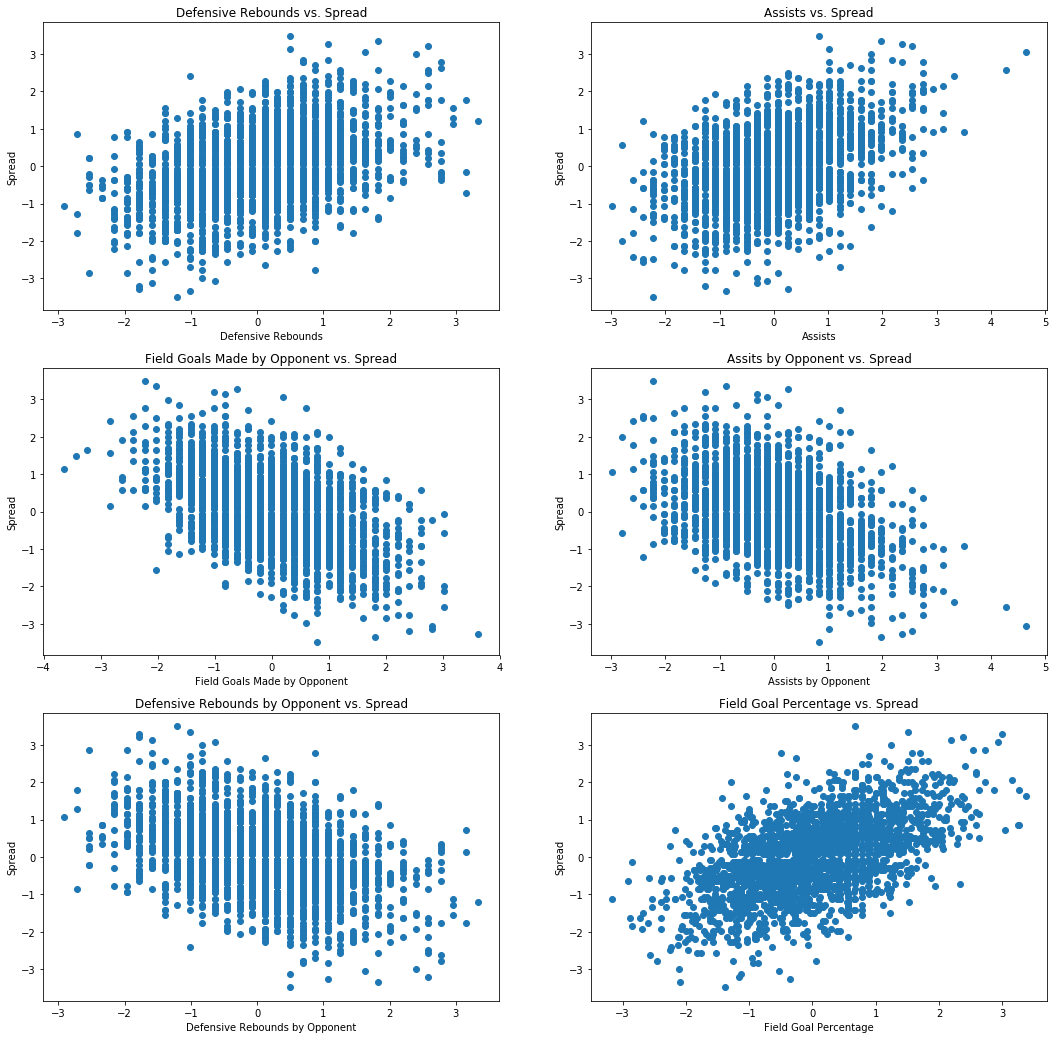

In [88]:
scatter_plot_league = plt.figure(figsize = (18,18))

spl1 = scatter_plot_league.add_subplot(3,2,1)
spl1.set_title('Defensive Rebounds vs. Spread')
spl1.set_ylabel('Spread')
spl1.set_xlabel('Defensive Rebounds')
spl1.scatter(standardize(cleaned_basketball_data['DREB.TEAM']), standardize(cleaned_basketball_data['SPREAD']))

spl2 = scatter_plot_league.add_subplot(3,2,2)
spl2.set_title('Assists vs. Spread')
spl2.set_ylabel('Spread')
spl2.set_xlabel('Assists')
spl2.scatter(standardize(cleaned_basketball_data['AST.TEAM']), standardize(cleaned_basketball_data['SPREAD']))

spl3 = scatter_plot_league.add_subplot(3,2,3)
spl3.set_title('Field Goals Made by Opponent vs. Spread')
spl3.set_ylabel('Spread')
spl3.set_xlabel('Field Goals Made by Opponent')
spl3.scatter(standardize(cleaned_basketball_data['FGM.OPP']), standardize(cleaned_basketball_data['SPREAD']))

spl4 = scatter_plot_league.add_subplot(3,2,4)
spl4.set_title('Assits by Opponent vs. Spread')
spl4.set_ylabel('Spread')
spl4.set_xlabel('Assists by Opponent')
spl4.scatter(standardize(cleaned_basketball_data['AST.OPP']), standardize(cleaned_basketball_data['SPREAD']))

spl5 = scatter_plot_league.add_subplot(3,2,5)
spl5.set_title('Defensive Rebounds by Opponent vs. Spread')
spl5.set_ylabel('Spread')
spl5.set_xlabel('Defensive Rebounds by Opponent')
spl5.scatter(standardize(cleaned_basketball_data['DREB.OPP']), standardize(cleaned_basketball_data['SPREAD']))

spl6 = scatter_plot_league.add_subplot(3,2,6)
spl6.set_title('Field Goal Percentage vs. Spread')
spl6.set_ylabel('Spread')
spl6.set_xlabel('Field Goal Percentage')
spl6.scatter(standardize(cleaned_basketball_data['FG%.TEAM']), standardize(cleaned_basketball_data['SPREAD']))

In [89]:
X = cleaned_basketball_data[['DREB.TEAM', 'AST.TEAM', 'FGM.OPP', 'AST.OPP', 'DREB.OPP', 'FG%.TEAM']]
y = cleaned_basketball_data['SPREAD']  
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SPREAD   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     986.0
Date:                Mon, 24 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:19:28   Log-Likelihood:                -8479.9
No. Observations:                2460   AIC:                         1.697e+04
Df Residuals:                    2453   BIC:                         1.701e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.4250      3.075     -8.270      0.000     -31.454     -19.396
DREB.TEAM      0.6986      0.032     21.679      0.000       0.635       0.762
AST.TEAM       0.5441      0.036     15.152      0.000       0.474       0.615
FGM.OPP       -1.0402      0.043    -24.438      0.000      -1.124      -0.957
AST.OPP       -0.3588      0.038     -9.396      0.000      -0.434      -0.284
DREB.OPP      -0.2742      0.041     -6.624      0.000      -0.355      -0.193
FG%.TEAM     104.0646      4.560     22.820      0.000      95.122     113.007
==============================================================================
Omnibus:                        0.754   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.770
Skew:                           0.042   Prob(JB):                        0.680
Kurtosis:                       2.983   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Therefore, our final model for spread across the league is:

SPREAD = -25.4250 + 0.6986 x DREB.TEAM + 0.5441 x AST.TEAM -1.0402 x FGM.OPP -0.3588 x AST.OPP - 0.2742 x DREB.OPP + 104.0646 x FG%.TEAM